### $\Rightarrow$ In this notebook we check if the subthreshold event in A0 detector are distributed in a uniform in sky area distribution (which indeed should be the case)

In [1]:
#-- import modules --

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import pandas as pd
import h5py 
import os
import sys
from itertools import combinations
import json
from scipy.interpolate import interp1d


import time
import math
import astropy_healpix as ah
from astropy import units as u
import healpy as hp
import ligo.skymap.plot           
from ligo.skymap.tool import ArgumentParser, FileType
from ligo.skymap.io import fits
from ligo.skymap.tool import ligo_skymap_contour
from ligo.skymap.postprocess import contour
from ligo.skymap import postprocess
from astropy.coordinates import SkyCoord
from astropy.time import Time
import scipy.stats as st
from scipy.optimize import bisect

from ligo.skymap import io
from ligo.skymap.bayestar import rasterize
from ligo.skymap import version
from astropy.table import Table
from astropy.time import Time
import numpy as np
import os
import sys
import pickle
from ligo.skymap.kde import Clustered2Plus1DSkyKDE, Clustered2DSkyKDE
import logging
from textwrap import wrap
from pycbc.detector import Detector

In [2]:
#-- detector networks of interest --

five_ifos = ['L1', 'H1', 'V1', 'K1', 'A0']
four_ifos = ['L1', 'H1', 'V1', 'K1']

## $\Rightarrow$ For A0 at O4

In [5]:
base_path = os.getcwd() +'/../../../PE_Network_A0_O4/detection_criteria_bns/'

In [6]:
event_O4 = np.loadtxt(base_path+'injections_{}_O4_SNR_20_to_25.txt'.format("".join(five_ifos)))
    
snr_a0_O4 = event_O4[:, 9]

sub_a0_O4_idx = np.where(snr_a0_O4 < 6)[0]

print(len(sub_a0_O4_idx))

191


In [7]:
#-- sky location coordinates --
ra_O4 = event_O4[:,0][sub_a0_O4_idx]
dec_O4 = event_O4[:,1][sub_a0_O4_idx]

In [8]:
sky_coords_O4 = {'ra':ra_O4, 'dec':dec_O4}

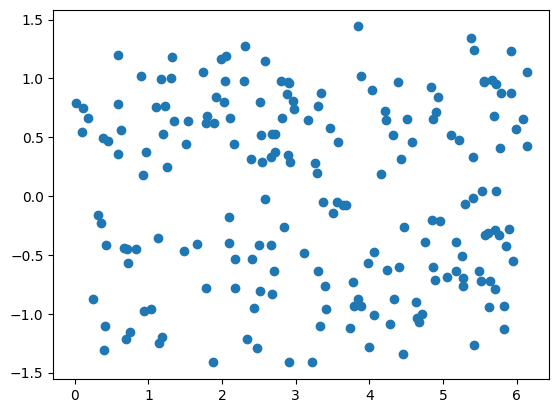

In [9]:
plt.scatter(ra_O4, dec_O4)

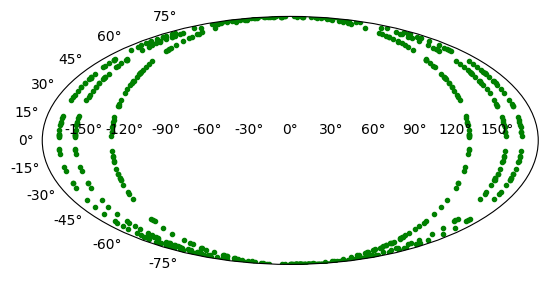

In [10]:
#-- plotting the molleweide projection

fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')

Lon_1,Lat_1 = np.meshgrid(np.pi - (ra_O4*180/np.pi), dec_O4*180/np.pi)

ax.scatter(Lon_1, Lat_1, marker='.', c='g')

plt.show()

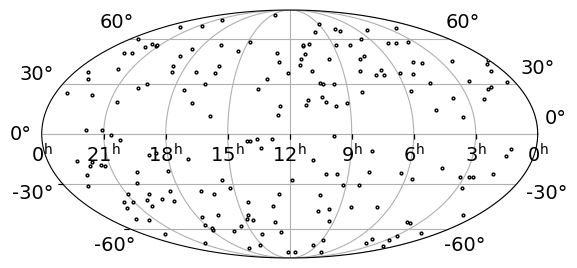

In [11]:
#-- ASTRO MOLLWEIDE PROJECTION --

fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)


for i in range(len(ra_O4)):
    
    #-- for injected ra, dec ---
    ax.plot_coord(SkyCoord(sky_coords_O4['ra'][i], sky_coords_O4['dec'][i], unit='rad'), 'o', markerfacecolor='gainsboro', markeredgecolor='black', markersize=2)

plt.show()

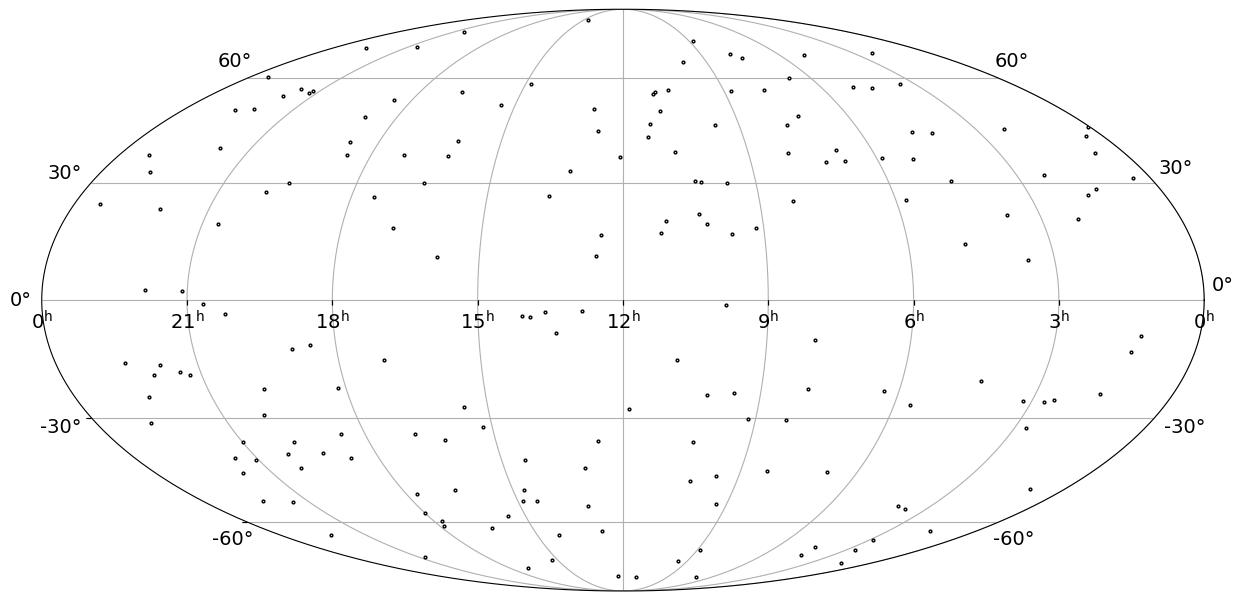

In [12]:
#-- ASTRO MOLLWEIDE PROJECTION --
plt.figure(figsize=(15, 8))
fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)
    
#-- for injected ra, dec ---
ax.plot_coord(SkyCoord(sky_coords_O4['ra'], sky_coords_O4['dec'], unit='rad'), 'o', markerfacecolor='gainsboro', markeredgecolor='black', markersize=2)

plt.show()

## $\Rightarrow$ For A0 at O5

In [13]:
base_path = os.getcwd() +'/../../../PE_Network_A0_O5/detection_criteria_bns/'

event_O5 = np.loadtxt(base_path+'injections_{}_O5_SNR_20_to_25.txt'.format("".join(five_ifos)))
    
snr_a0_O5 = event_O5[:, 9]

sub_a0_O5_idx = np.where(snr_a0_O5 < 6)[0]

print(len(sub_a0_O5_idx))

44


In [14]:
#-- sky location coordinates --
ra_O5 = event_O5[:,0][sub_a0_O5_idx]
dec_O5 = event_O5[:,1][sub_a0_O5_idx]

In [15]:
sky_coords_O5 = {'ra':ra_O5, 'dec':dec_O5}

In [16]:
dec_O5.min(), dec_O5.max(), ra_O5.min(), ra_O5.max()

(-1.2614170953237709, 1.345801879307432, 0.242674021161899, 6.136784739475465)

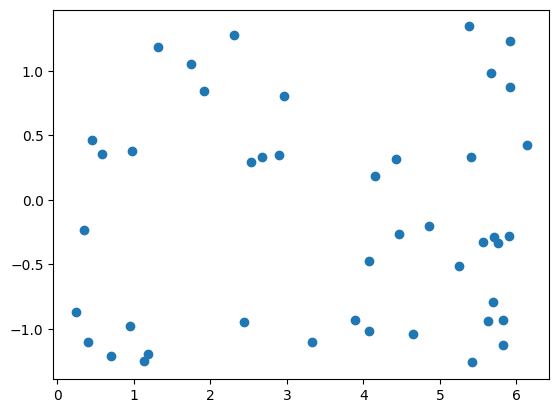

In [17]:
plt.scatter(ra_O5, dec_O5);

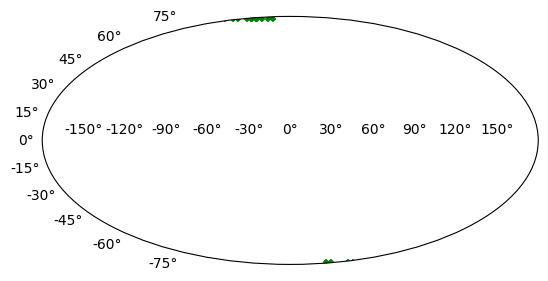

In [18]:
#-- plotting the molleweide projection

fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')

Lon_2,Lat_2 = np.meshgrid(np.pi - (ra_O5*180/np.pi), dec_O5*180/np.pi)

ax.scatter(Lon_2, Lat_2, marker='X', c='g', s=50)

plt.show()

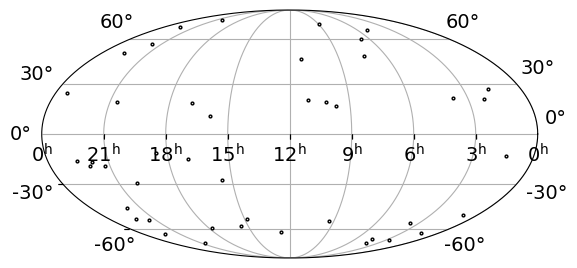

In [19]:
#-- ASTRO MOLLWEIDE PROJECTION --

fontsize = 14

#-- plotting arguments ----
axes_args = {}
axes_args['projection'] = 'astro hours'
axes_args['projection'] += ' ' + 'mollweide'

ax = plt.axes(**axes_args)
ax.grid()
ax.tick_params(which='both', labelsize=fontsize)


for i in range(len(ra_O5)):
    
    #-- for injected ra, dec ---
    ax.plot_coord(SkyCoord(sky_coords_O5['ra'][i], sky_coords_O5['dec'][i], unit='rad'), 'o', markerfacecolor='gainsboro', markeredgecolor='black', markersize=2)

plt.show()